In [ ]:
import Pkg
Pkg.add("DifferentialEquations")

In [ ]:
Pkg.add("Plots")

In [1]:
include("src/Sim.jl")

Main.Sim

In [2]:
using DifferentialEquations
using Plots
using .Sim

In [ ]:
using Pkg
Pkg.add(url="https://github.com/JuliaMBD/JuliaMBDv1.git")

In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("DifferentialEquations")

In [ ]:
using JuliaMBDv1
using DifferentialEquations
using Plots

In [3]:
#出来ている

In [4]:
#@blk ConstantブロックはIntegratorBlock()の入力ポートが一つになるように削除した
@model Tr_f_pnt begin
    
    @parameter d_Fr_wheel #Gainブロック
    @parameter k_Fr_wheel #Gain1ブロック
    @parameter z_k_Fr_wheel_ini #Constantブロック
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Fr_wheel_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Fr_wheel)
    @blk Gain1 = GainBlock(k_Fr_wheel)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Gain3 = GainBlock(2)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    #@connect Constant => cons
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Gain3
    @connect Gain3 => Out1
    @connect Gain3 => Gain2
    @connect Gain2 => Out2
end

Tr_f_pnt (generic function with 1 method)

In [5]:
@model TestTr_f_pnt begin
    @parameter d_Fr_wheel k_Fr_wheel z_k_Fr_wheel_ini
    ##@blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:in1
    
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 15) outport:inin2
    @blk tr_f = Tr_f_pnt(d_Fr_wheel=d_Fr_wheel, k_Fr_wheel=k_Fr_wheel, z_k_Fr_wheel_ini=z_k_Fr_wheel_ini) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    
    @connect inin1 => r
    @connect inin2 => y

end

TestTr_f_pnt (generic function with 1 method)

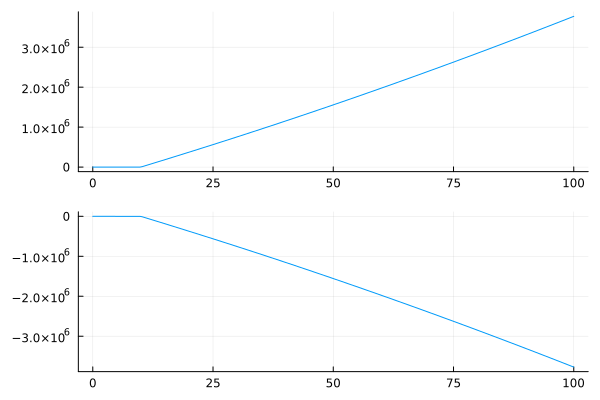

In [6]:
#初期値が未定義
m = TestTr_f_pnt(d_Fr_wheel=1825.3, k_Fr_wheel=6, z_k_Fr_wheel_ini=0.00036769);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph